# Getting Starting with Bias Mitigation

In [5]:
# sys path
import sys
sys.path.append('../../')

In [6]:
# Adult dataset
from holisticai.datasets import load_adult
from sklearn.model_selection import train_test_split
import pandas as pd

In [7]:
# Dataset
data = load_adult()

# Dataframe
df = pd.concat([data["data"], data["target"]], axis=1)

In [8]:
# Dataset
data = load_adult()

# Dataframe
df = pd.concat([data["data"], data["target"]], axis=1)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25.0,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38.0,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28.0,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44.0,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,18.0,NaN,103497.0,Some-college,10.0,Never-married,NaN,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K


<AxesSubplot:>

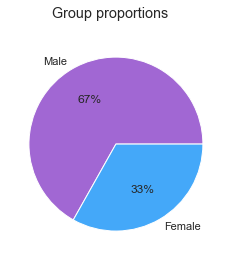

In [20]:
from holisticai.bias.plots import group_pie_plot, success_rate_curve
p_attr = df['sex'] # protected attribute (race)
group_pie_plot(p_attr)

<AxesSubplot:xlabel='Group B Success Rate %', ylabel='Group A Success Rate %'>

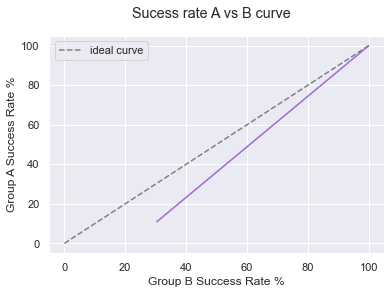

In [10]:
group = ["sex"]
group_a = (df[group] == "Female")
group_b = (df[group] == "Male")
y = df['class'].replace({'<=50K':0, '>50K':1})
success_rate_curve(group_a, group_b, y)

In [11]:
protected_variables = ["sex", "race"]
output_variable = ["class"]

X = pd.get_dummies(df.drop(protected_variables + output_variable, axis=1))

In [12]:
data_ = [X, y, group_a, group_b]

# Train test split
dataset = train_test_split(*data_, test_size=0.2, shuffle=True)
train_data = dataset[::2]
test_data = dataset[1::2]

# Putting all together

In [21]:
def preprocessed_dataset_load_adult():
    # Dataset
    data = load_adult()

    # Dataframe
    df = pd.concat([data["data"], data["target"]], axis=1)

    group_a = (df["sex"] == "Female")
    
    group_b = (df["sex"] == "Male")
    
    y = df['class'].replace({'<=50K':0, '>50K':1})
    
    protected_variables = ["sex", "race"]
    output_variable = ["class"]
    X = pd.get_dummies(df.drop(protected_variables + output_variable, axis=1))
    
    dataset = train_test_split(*data_, test_size=0.2, shuffle=True)
    train_data = dataset[::2]
    test_data = dataset[1::2]

    return train_data, test_data

: 

# Training Simple Binary Classification

In [16]:
from sklearn.linear_model import LogisticRegression

train_data , test_data = preprocessed_dataset_load_adult()

x,y, group_a, group_b = train_data
model = LogisticRegression()
model.fit(x,y)

x,y, group_a, group_b = test_data
y_pred = model.predict(x)

In [17]:
from utils import classification_efficacy_metrics
classification_efficacy_metrics(y_pred, y)

,Value
Metric,
Accuracy,0.796397
Balanced accuracy,0.617471
Precision,0.721219
Recall,0.268375
F1-Score,0.391185


In [19]:
from holisticai.metrics.bias import classification_bias_metrics
classification_bias_metrics(group_a, group_b, y_pred, y)

,Value,Reference
Metric,,
Statistical Parity,-0.049244,0
Disparate Impact,0.540413,1
Four Fifths Rule,0.540413,1
Cohen D,-0.172039,0
